# Exploring OpenEEW data

## Import openeew package

In [2]:
from openeew.data.aws import AwsDataClient
from openeew.data.df import get_df_from_records

## Import other packages

In [3]:
import folium
from datetime import datetime
import plotnine as pn
import pandas as pd
from geopy.distance import distance
import aioboto3
# Allow nested asyncio event loop
# See https://github.com/erdewit/nest_asyncio
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pywt
import numpy as np
import statistics
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv, det
import math
from math import log, pi, exp

# NEW CODE
## Data tempreture

In [4]:
#BORUJErD
#te są z artukułu
#tempreture_LST = [24, 30, 24, 30, 17, 19, 17, 16, 30, 30, 31, 27, 23, 28, 28, 28, 27, 27, 21, 26, 17, 36, 30, 27, 25, 21, 17, 25]
#tempreture_AT = [19, 19, 19, 22, 23, 22, 17, 15, 19, 21, 20, 22, 20, 19, 16, 16, 16, 17, 20, 21, 20, 23, 16, 21, 16, 11, 16, 19]
#te 'moje' dla tych są wyniki
#tempreture_LST = [37, 47, 22, 47, 37, 32, 27, 37, 32, 22, 32, 32, 27, 32, 32, 32, 22, 27, 27, 22, 52, 42 ,37, 32, 22, 17, 12 ,22]
#tempreture_AT = [16, 16, 15, 16, 21, 16, 11, 14, 16, 18, 20, 17 ,17, 15, 14, 15, 16, 16, 12, 13, 17, 20, 21, 19, 17, 7, 12, 14]
#PIJIJIAPAN
#tempreture_LST = [ 47, 57, 57, 52, 52, 42, 52, 32, 37, 32, 42, 42, 37, 32, 42, 47, 47, 37, 32, 42, 42, 47, 52, 37, 52, 47, 52, 47]
#tempreture_AT = [ 32.2, 32.1, 32.1, 32.1, 32.1, 32.1, 32.1, 32.1, 32.1, 32.1, 32.1, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
#CRUCECITA
#tempreture_LST = [47, 52, 47, 32, 37, 42, 42, 37, 32, 27, 32, 32, 32, 37, 27, 32, 32, 37, 37, 37, 42, 37, 37, 37, 37, 37, 36, 27]
#tempreture_AT = [32, 33, 30, 30, 27, 28, 28, 28, 31, 26, 26, 28, 26, 27, 30, 31, 29, 28, 26, 26, 28, 29, 30, 29, 29, 30, 29, 29]
#IXTEPEC
#tempreture_LST = [32, 32, 32, 27, 32, 32, 32, 32, 22, 22, 27, 27, 27, 27, 27, 37, 44, 37, 22, 37, 17, 22, 27, 27, 32, 22, 27, 32]
#tempreture_AT = [25, 23, 21, 16, 20, 21, 21, 16, 19, 23, 21, 16, 15, 13, 17, 15, 17, 22, 23, 26, 27, 24, 23, 24, 25, 26, 22, 24]
#NORDE DE ISLA
tempreture_LST = [27, 22, 22, 27, 27, 22, 22, 27, 22, 22, 22, 22, 32, 37, 37, 27, 27, 27, 32, 32, 32, 37, 27, 27, 27, 27, 27, 27]
tempreture_AT = [32, 20, 17, 25, 23, 20, 24, 26, 26, 26, 21, 22, 24, 27, 30, 26, 25, 25, 29, 29, 29, 29, 29, 26, 27, 23, 25, 26]

# 1

## Kwartilinan

In [73]:
#zachowanie uważane za anormalne kiedy: p = ±100×(|Dx|−k)/k
#p - procent zmian parametrów ze stanu niezakłóconego
#p = 80–85%, że wykryto niższy lub wyższy nieprawidłowy sygnał


# Dx = wartość bezwzględna różniczki
# x = różniczka (a cóż to????) to jest jakby szukana? a jak jest oznaczane Q2?
#k - optymalna wartość progowa ... WHAAT?????, ja przyjęłam dla stopnia kwartyla
#IQR - rozstęp kwartylowy


#TRZEBA OBLICZYĆ XHIGH I HLOW

In [5]:
#tempreture at day (LST): odstęp
#badana próbka
#x to : 1/4 dla Q1, 1/2 DLA Q2 I 3/4 DLA Q3 I 1 DLA Q4
x = 22 #wartość temp. w badanym dniu
tempreture_LST.sort()
print("Tempreture at day (LST) : ", tempreture_LST)
print("Q1 quantile of SLtractors : ", np.quantile(tempreture_LST, .25)) #1-szy kwartyl
print("Q2 quantile of SLtractors : ", np.quantile(tempreture_LST, .50)) #mediana
print("Q3 quantile of SLtractors : ", np.quantile(tempreture_LST, .75)) #3-ci kwartyl

#median = Q2
Q1 = np.quantile(tempreture_LST, .25)
Q3 = np.quantile(tempreture_LST, .75)
median1 = statistics.median(tempreture_LST)
print("Median:", median1)

#IQR
IQRdayLST = np.quantile(tempreture_LST, .75) - np.quantile(tempreture_LST, .25) #obliczenie międzykwartyla
print("IQR:", IQRdayLST)
#k parameter który jest stopniem kwartyla
Dx = (x - median1)/IQRdayLST #różniczka
Dx = abs(Dx) #|różniczka|
print("|Dx| parameter: ", Dx)
k = 1 #kwartyl
print("k value:", k)
# percent anomaly
p = 100*(Dx - k)/k #procent anomalii
print("Percent anomaly value: ", abs(p))


Tempreture at day (LST) :  [22, 22, 22, 22, 22, 22, 22, 22, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 32, 32, 32, 32, 37, 37, 37]
Q1 quantile of SLtractors :  22.0
Q2 quantile of SLtractors :  27.0
Q3 quantile of SLtractors :  28.25
Median: 27.0
IQR: 6.25
|Dx| parameter:  0.8
k value: 1
Percent anomaly value:  19.999999999999996


In [75]:
#Tempreture at day (AT): odst ęp

x = 28
tempreture_AT.sort()
print("Tempreture at day (AT) : ", tempreture_AT)
print("Q1 quantile of SLtractors : ", np.quantile(tempreture_AT, .25))
print("Q2 quantile of SLtractors : ", np.quantile(tempreture_AT, .50))
print("Q3 quantile of SLtractors : ", np.quantile(tempreture_AT, .75))

#median
MM = statistics.median(tempreture_AT)
q1 = np.quantile(tempreture_AT, .25)
q3 = np.quantile(tempreture_AT, .75)
#IQR
IQRdayAT = np.quantile(tempreture_AT, .75) - np.quantile(tempreture_AT, .25)
print("IQR:",IQRdayAT)

#k parameter
k = 1
print("k parameter:", k)
#x to : 1/4 dla Q1, 1/2 DLA Q2 I 3/4 DLA Q3 I 1 DLA Q4
Dx = (x- MM)/IQRdayAT
print("Dx parameter:", Dx)
Dx = abs(Dx)
print("|Dx| parameter: ", Dx)

# percent anomaly
p1 = 100*(Dx - k)/k
print("Percent anomaly value: ", abs(p1))



Tempreture at day (AT) :  [17, 20, 20, 21, 22, 23, 23, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 29, 29, 29, 29, 29, 30, 32]
Q1 quantile of SLtractors :  23.75
Q2 quantile of SLtractors :  26.0
Q3 quantile of SLtractors :  27.5
IQR: 3.75
k parameter: 1
Dx parameter: 0.5333333333333333
|Dx| parameter:  0.5333333333333333
Percent anomaly value:  46.666666666666664


# 2

## Wavelet transform

Approximation coefficient:  [36.41599923 32.88046533 36.41599923 32.88046533 35.29527989 31.11269837
 31.41299421 51.20518247 43.01339532 38.65743791 44.60778638 48.96374379
 38.18376618 38.18376618 38.18376618]
Detail coefficient:  [ 3.06186218e+00 -3.06186218e+00  3.06186218e+00 -3.06186218e+00
 -1.12071934e+00  2.66453526e-15  1.12071934e+00  5.47667674e+00
 -1.29409523e+00  1.76776695e+00 -2.41481457e+00 -2.88848629e+00
 -1.33226763e-15 -1.33226763e-15 -1.33226763e-15]
Anomaly value:  33.875


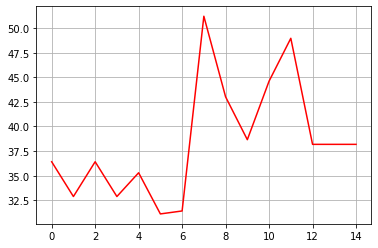

In [78]:
tempreture_LST = [37, 47, 22, 47, 37, 32, 27, 37, 32, 22, 32, 32, 27, 32, 32, 32, 22, 27, 27, 22, 52, 42 ,37, 32, 22, 17, 12 ,22] #dane
#print(sympy.integrate(tempreture_LST_DAY*(x-b/a)))
cA, cD = pywt.dwt(tempreture_LST, 'db2') #falka daubedies co jest ok bo w artykule tej użyto
#cA - Współczynnik aproksymacji
#cD -i szczegółowości.
print("Approximation coefficient: ", cA)
print("Detail coefficient: ", cD)
median1 = statistics.median(tempreture_LST)
plt.grid(True)
t = np.average(30)
plt.plot(cA, 'r')
plt.show()


# 3

## Kalman filter

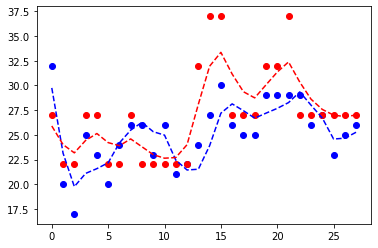

In [82]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time

#dane, pierwsze miejsce AT, drugie LST
measurements = np.asarray([(32,27),(20,22),(17,22),(25,27),(23,27),(20,22),(24,22),(26,27),(26,22),(23,22),(26,22),(21,22),(22,22),(24,32),(27,37),(30,37),(26,27),(25,27),(25,27),(29,32),(29,32),(29,37),(29,27),(26,27),(27,27),(23,27),(25,27),(26,27)])

initial_state_mean = [measurements[0, 0],0,
                      measurements[0, 1],0]

transition_matrix = [[1, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 1],
                      [0, 0, 1, 1]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                   observation_matrices = observation_matrix,
                   initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

plt.figure(1)
times = range(measurements.shape[0])
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()

In [15]:
#EXAMPLE FOR FUNKCTIONS

In [98]:
##### WYNIKI MIĘDZYKWARTYL
#BORUJEND
#1
#wyniki pokrywają się z tymi z artykuła - okolice 26.03 anomalia 90% - 80-85% już jest uznana za anomalię
#25.03 anomalia na poziomie 80%, późniejsze dni, pojaiwa się anomalia 100%
#wcześniejsze dni - anomalia na poziomie 46,66666%, kiedy wcześniej zdarza się anomalia dla danych, dla T tez
# zasada: anomalia dla lst i at nie powoduje że jest anomalia, at anoomalia a lst nie to nic, bo badam lst a at jest dodatkiem
#lst -główny wskaźnik
#

#PIJIJIAPAN
# w przypadku AT zmienność temperatury zmieniała się minimalnie,
#7-my dzień????, 19.08, 23.08, 24.08, 27  na pewno (83,333), 21/22.08 ale tu zmiana temp. AT,
#26(88%)
#39, 30 (100%)
# 01.09 91,6666%,05,07  , 02.09, 04,06  (83,3333),  03.09 (91.66666666666666%)
#CRUCECITA
#wykrycie dień przed trzęsieniem na poziomie 95%, 5 DNI WCZEŚNIEJ 100%,
#IXTEPEC
#ykryte dzień przed trzęsieniem. patrz na borujend
#NORDE DE ISLA
#brak wykrycia

In [100]:
######## WYNIKI WAVELET
#BORUJEND
#wykrycie trzęsienia - 26.03 czyli ok

#PIJIJIAPAN
#już pierwszy dzień pomiaru???
#11 i 13 dzień

#CRUCECITA
#10-ty dień obserwacji
#1-szy dzień
#IXTEPEC
#8-my dzień obserwacji i 14-ty
#NORDE DE ISLA
#7-my, 10 i 11